<a href="https://colab.research.google.com/github/Marwane97/Algoritm_c-codes/blob/master/MyCase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Çalışmanın Özeti**


---

>Bu çalışmada, kullandığım ML modeli Logistic Regression'dur. Logistic Regression, Scikit_Learn kütüphanesinde bulunan bir modeldir. O Lojistik fonksiyon kullanarak tahmin işlemini yapar. Onu kullanarak kuyruk numarası (" TAIL_NUMBER" ) ve uçuş tarihi parametrelerini dikkate alarak, 3 sınıflı sınıflandırma işlemini gerçekleştirdim. Bir uçuş, ya gecikmesiz, ya gecikmeli ya da iptal olma ihtimali vardır. Böylece, dataset'imizi belirli bir oranda train set (0.75%) ve test set (0.25%) olmak üzere iki gruba ayırdım. Train set'ini eğitim amaçlı olarak kullandıktan sonra, test seti ise, modelin doğruluğunu değerlendirmek için kullandım.



>Geliştirdiğim sistemin alacağı girdi kısıtlı (PC1030 15-11-2020 kuyruk numarası ve tarih) olduğu için, modelin yaptığı tahmin daha da iyileştirmek mümkündür. Bu iyileştirmeyi gerçekleştirmek için, sadece kuyruk numarası ve tarihe sınırlandırmaktansa, daha fazla girdi verisini dikkate almakta fayda var diye düşünüyorum. Örnek olarak, her uçuşun delay/iptal olma ihtimalini daha keskin bir şekilde tahmin etmek için, hava durumu dikkate alınmalı, uçuşun nereden nereye gideceğinin bilgisini alıp kalkış ve varış havaalanlarının yoğunluk oranları da dikkate alınmalı, olası hava trafik yoğunluklarıda dikkate alınmalıdır. Bunun yanında, yapılacak uçuşun sorumlu şirketin önceki aylarda veya önceki seferlerde ne kadar gecikme/iptal durumu veya ne kadar dakiklik gösterdiğini dikkate alarak sonraki seferlerde delay/cancel yapıp yapmayacağını tahmin etme işlemi daha da iyileştirilebilir. 
Ayrıca, Reinforcement learning gibi bir öğrenme tipini de kullanarak sistemin kendi kendisi öğrenmesini sağlayabiliriz. Bu yöntemde, sistem doğru tahmin gerçekleştiğinde ona pozitif bir feedback (ödül), yanlış tahmin yapsa ona negatif bir feedback (ceza) vererek kendi kendisi girdi faktörleri ve aldığı ödül/ceza dikkate alarak iyileşip daha doğru tahminler yapabilecek hale gelir. Reinforcement Learning yerinde, benim yaptığım gibi Supervised Learning'ı kullanarak da tahmin işlemi yapılır. Burada kullanmış olduğum Logistik Regression yönteminin dışında da Neural networkler ve diğer sınıflandırma yöntemler kullanılarak tahmin işlemi yapmak mümkündür. 

> Yapay sinir ağları kullanmak istediğimizde her modelde olduğu gibi ilk olarak sayısal işlemler yapılacağı için, sayi tipinde olmayan girdileri (örneğin kuyruk numarası PC1030) sayisal hale dönüştürüp onlara denk gelen uygun sayıları hesaplayıp atamak gerekmektedir. Yapay sinir ağları giriş katmanı, gizli katmaları ve çıkış olmak üzere üç bölümden oluşur. Veri setimiz Neural Network modelimize uygulayarabiliriz ve beklenen sonuçları dikkate alarak tahmin işlemini yapabiliriz. Aynı zamanda, Neural Network'taki backpropagation işlemi sayesinde, her (n+1). seferdeki hesaplamada, önceki hesaplamanın hataları dikkate alınır ve onların azaltılması doğrultusunda devam edilir. Ek olarak, Neural Network'un bize sağlayabileceği başka bir fayda şudur: her uçuşun gecikmeli olma olasılığı veya iptal olma olasılığını oranlarla bize hesaplayabilmektedir. Bunları vermektense, o yine de bize muhtemel olan geçikmenin süresini de tahmin etmemizi sağlayabilir. Bunların sonucunda, elde edilen sistemi farklı yazılım uygulamalarına entegre edip uçuş delay/cancel olma tahminlerini gerçekleştirmemiz mümkündür.

>Bu yazılım uygulamalarından birisi web uygulamalarıdır. Bu sistemi bir web uygulamasına entegre etmek istendiğinde, ilk olarak makine öğrenmesi modelimizin girdi verilerini nereden çekeceğini ve onun oluşturacağı çıktıların nerede nasıl bir formata gösterileceğine dikkat etmekte fayda var diye düşünüyorum. Modelin alacağı girdileri düşünüldüğünde, web uygulamanın bağlı olduğu veri tabanını kullanabiliriz. Güvenli olması acısından, orijinal veri tabanı kullanmaktansa, onun bir kopyasını elde edip onun üzerinde makine öğrenmesi analiz ve hesaplamaları yapılabilir ve modele o veriler girdi olarak sunduğunda, modelin üretiği tahmin sonuçları uçuşların seçim özelliklerinde de gösterilebilir. Mesela Uçuşlar gösterilirken, müşteriye gecikmeli/iptal olma oranlarına göre sıralanabilir veya böyle bir sıralama seçeneği de sunulabilir. Bence, her uçuş yapıldıktan sonra, ona ait gerçek gecikme bilgiler de veri tabanına eklenmeli ki sistemin sonraki tahminlerde daha verimli ve daha doğru bir şekilde tahmin edebilsin. Gerçek zamanlı bir web uygulamasına entegre etmek istediğimizde, bir API üzerinden model ile haberleşme işlemlerin yapılması (girdi/çıktı) sağlanabilir diye düşünüyorum. Bemce Sistemin performansının kötü bir şekilde etkilenmemesi için, modelimizin eğitimini (training) ne zaman gerçekleştirilmesi gerektiği de planlamakta fayda var (scheduling). Model'in ne kadar kullanıldığını kontrol etmek üzere, bir Log kayıdı de tutulabilir.     








    



---
# **Kaggle den ' 2015 Flight Delays and Cancellations ' veri setini indirme**



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d usdot/flight-delays

 97% 186M/191M [00:03<00:00, 56.5MB/s]
100% 191M/191M [00:03<00:00, 55.2MB/s]


In [ ]:
!ls

flight-delays.zip  kaggle.json


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  flight-delays.zip
  inflating: airlines.csv            
  inflating: airports.csv            
  inflating: flights.csv             


In [ ]:
# Kullanacağım kütüphaneleri import etmek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

In [ ]:
# Veri seti okumak
flights = pd.read_csv("flights.csv",low_memory=False)
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Veri seti incelemek 
flights.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,5.819073e+06,5.714008e+06,5.714008e+06,5.819079e+06,5.726566e+06,5.726566e+06,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,1.416859e+02,1.370062e+02,1.135116e+02,8.223565e+02,1.471469e+03,7.434971e+00,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,7.521058e+01,7.421107e+01,7.223082e+01,6.077843e+02,5.221879e+02,5.638548e+00,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,1.800000e+01,1.400000e+01,7.000000e+00,2.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,8.500000e+01,8.200000e+01,6.000000e+01,3.730000e+02,1.054000e+03,4.000000e+00,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,1.230000e+02,1.180000e+02,9.400000e+01,6.470000e+02,1.509000e+03,6.000000e+00,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,1.730000e+02,1.680000e+02,1.440000e+02,1.062000e+03,1.911000e+03,9.000000e+00,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,7.180000e+02,7.660000e+02,6.900000e+02,4.983000e+03,2.400000e+03,2.480000e+02,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [ ]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [ ]:
canceled_delay = flights[['MONTH','DAY','TAIL_NUMBER','CANCELLED','ARRIVAL_DELAY']]
canceled_delay.head()

,MONTH,DAY,TAIL_NUMBER,CANCELLED,ARRIVAL_DELAY
0,1,1,N407AS,0,-22.0
1,1,1,N3KUAA,0,-9.0
2,1,1,N171US,0,5.0
3,1,1,N3HYAA,0,-9.0
4,1,1,N527AS,0,-21.0


In [ ]:
canceled_delay.isnull().sum(axis=0)

MONTH                 0
DAY                   0
TAIL_NUMBER       14721
CANCELLED             0
ARRIVAL_DELAY    105071
dtype: int64


---
# **"TAIL_NUMBER" sayısal olarak çevirelim**





In [ ]:
# Tail_number değişkeni 1'den başlayarak veri setindeki unique sayısına kadar değerler alır

tail_unique = canceled_delay['TAIL_NUMBER'].unique()
tail_unique_values = list(range(1, len(tail_unique)+1))

diction = {tail_unique[i]: tail_unique_values[i] for i in range(len(tail_unique))} 

def fun(string):
    if string in diction:
        return int(diction[string])

tail_number = canceled_delay["TAIL_NUMBER"].apply(fun)
canceled_delay["TAIL_NUMBER"] = tail_number
canceled_delay.head()

,MONTH,DAY,TAIL_NUMBER,CANCELLED,ARRIVAL_DELAY
0,1,1,1,0,-22.0
1,1,1,2,0,-9.0
2,1,1,3,0,5.0
3,1,1,4,0,-9.0
4,1,1,5,0,-21.0


In [ ]:
# Eksik değerleri 0 değeriyle doldurmak
canceled_delay = canceled_delay.fillna(0)
canceled_delay.isnull().sum(axis=0)

MONTH            0
DAY              0
TAIL_NUMBER      0
CANCELLED        0
ARRIVAL_DELAY    0
dtype: int64

# **DELAY_CANCEL** 
1.   *CANCELED: 1*
2.   *DELAYED: 2*
3.   *NOT_DELAYED: 0*  




In [ ]:
canceled_delay['DELAY_CANCEL'] = [ 2 if item > 0 else 0 for item in canceled_delay['ARRIVAL_DELAY']]

i = 0
for item in canceled_delay['CANCELLED']:
    if item == 1:
        canceled_delay['DELAY_CANCEL'].iloc[i] = 1
    i = i+1


canceled_delay = canceled_delay[['MONTH','DAY','TAIL_NUMBER','DELAY_CANCEL']]
canceled_delay.head()

,MONTH,DAY,TAIL_NUMBER,DELAY_CANCEL
0,1,1,1,0
1,1,1,2,0
2,1,1,3,2
3,1,1,4,0
4,1,1,5,0


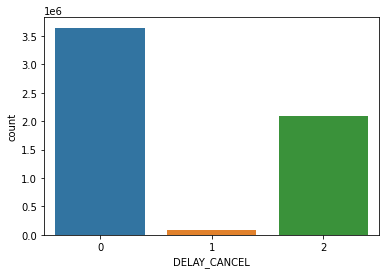

In [ ]:
# Çeşitli sınıfları görselleştirmek
sns.countplot('DELAY_CANCEL',data=canceled_delay)
plt.show()

In [ ]:
# Veri seti X ve Y olarak ayrışmak
Y = canceled_delay['DELAY_CANCEL']
X = canceled_delay.drop(['DELAY_CANCEL'], axis=1)

In [ ]:
# Veri seti Eğitim seti ve Test seti olarak bölme işlemi
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [ ]:
# LogisticRegression Modeli 
from sklearn.linear_model import LogisticRegression 

LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
LR.fit(x_train, y_train)

LR.score(x_test,y_test)

0.6259188737738611

In [ ]:
# Predict yapma metodu

def my_prediction(result):
    my_result = ""
    if result[0] == 0:
        my_result = "There will not be any delay"
    elif result[0] == 1:
        my_result = "This flight will be cancel"
    else:
        my_result = "There will be a delay"

    return my_result
       


In [ ]:
# Predict edilecek veriyi hazırlayıp tahmin etme
def procesing(tail,flight_date='15-11-2020'):
    
    if tail in diction:
        number_tail = diction.get(tail)
    else:
        diction[tail] = diction.get(list(diction.keys())[-1])+1
        number_tail = diction.get(tail)
    
    day = int(flight_date[:2])
    month = int(flight_date[3:5])

    my_array = [month,day,number_tail]
    my_array = np.array(my_array)
    my_array = my_array.reshape(-1,1).T
    
    
    result =  my_prediction(LR.predict(my_array))

    return result

predicted = procesing('N3HYAA')
predicted

'There will not be any delay'